In [1]:
import pandas as pd
from tqdm import tqdm
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset.csv")

In [3]:
data.head(4)

,MemberId,TransactionId,CardNo,Date,ClientId,SiteId,TransactionDetailsId,ProductId,Quantity,Value,Gender,R,F,M,Age
0,3417,10133,545651023457116,2017-03-25 22:48:02.037000000,1127,1217,456,23,2,1000.0,male,1,1,2,19
1,3417,10133,545651023457116,2017-03-25 22:48:02.037000000,1127,1217,457,70,2,0.0,female,1,2,1,20
2,3417,10133,545651023457116,2017-03-25 22:48:02.037000000,1127,1217,458,24,1,600.0,male,1,4,2,28
3,3417,10133,545651023457116,2017-03-25 22:48:02.037000000,1127,1217,459,31,1,999.0,female,2,1,2,28


In [4]:
def score(r,f,m):
    return((r*100)+(f*10)+m)

In [29]:
RFM_score=[]
for i in tqdm(range(len(data))):
    RFM_score.append(score(data.R[i],data.F[i],data.M[i]))
    

100%|██████████| 200000/200000 [00:20<00:00, 9833.19it/s]


In [6]:
data["RFM_score"] = RFM_score 

In [7]:
data.isnull().values.any()

False

In [8]:
temp_main = data
temp = data[["RFM_score"]]

In [9]:
temp.head(2)

,RFM_score
0,112
1,121


In [10]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(temp)

In [11]:
labels = kmeans.labels_

In [12]:
temp_main["label"] = labels

In [13]:
sns.lmplot('Age','RFM_score',data=temp_main,fit_reg=False,hue="label",scatter_kws={"marker":"D","s":10})
plt.xlabel('AGE')
plt.ylabel('RFM_score')

Text(27.7778,0.5,'RFM_score')

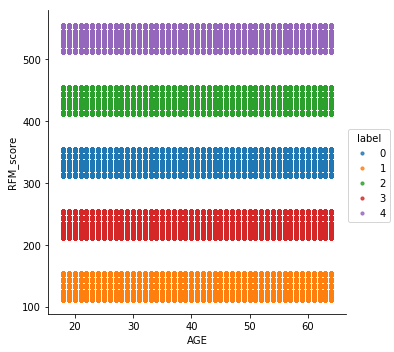

In [14]:
plt.show()

In [15]:
#segmenting 5 different dataframes wrt the labels
class0 = temp_main[temp_main["label"]==0]
class1 = temp_main[temp_main["label"]==1]
class2 = temp_main[temp_main["label"]==2]
class3 = temp_main[temp_main["label"]==3]
class4 = temp_main[temp_main["label"]==4]

In [17]:
temp_0 = class0[["Gender","Age"]]
temp_1 = class1[["Gender","Age"]]
temp_2 = class2[["Gender","Age"]]
temp_3 = class3[["Gender","Age"]]
temp_4 = class4[["Gender","Age"]]

In [18]:
def convert(df):
    gender = {"male":0,"female":1}
    temp = df["Gender"].map(gender)
    df['Gender'] = temp
    return df

In [19]:
chk_0 = convert(temp_0).values
chk_1 = convert(temp_1).values
chk_2 = convert(temp_2).values
chk_3 = convert(temp_3).values
chk_4 = convert(temp_4).values

/home/reynold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
kmeans0 = KMeans(n_clusters=3,random_state=0).fit(chk_0)
kmeans1 = KMeans(n_clusters=3,random_state=0).fit(chk_1)
kmeans2 = KMeans(n_clusters=3,random_state=0).fit(chk_2) 
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(chk_3)
kmeans4 = KMeans(n_clusters=3,random_state=0).fit(chk_4)

In [22]:
class0["label"] = kmeans0.labels_
class1["label"] = kmeans1.labels_
class2["label"] = kmeans2.labels_
class3["label"] = kmeans3.labels_
class4["label"] = kmeans4.labels_

/home/reynold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/reynold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/reynold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [23]:
#segmentaion under class0 clusters into furthur segment
sub_0a = class0[class0["label"]==0]
sub_0b = class0[class0["label"]==1]
sub_0c = class0[class0["label"]==2]
#segmentaion under class1 clusters into furthur segment
sub_1a = class1[class1["label"]==0]
sub_1b = class1[class1["label"]==1]
sub_1c = class1[class1["label"]==2]
#segmentaion under class2 clusters into furthur segment
sub_2a = class2[class2["label"]==0]
sub_2b = class2[class2["label"]==1]
sub_2c = class2[class2["label"]==2]
#segmentaion under class3 clusters into furthur segment
sub_3a = class3[class3["label"]==0]
sub_3b = class3[class3["label"]==1]
sub_3c = class3[class3["label"]==2]
#segmentaion under class4 clusters into furthur segment
sub_4a = class4[class4["label"]==0]
sub_4b = class4[class4["label"]==1]
sub_4c = class4[class4["label"]==2]

In [24]:
sub_0a.columns.values

array(['MemberId', 'TransactionId', 'CardNo', 'Date', 'ClientId', 'SiteId',
       'TransactionDetailsId', 'ProductId', 'Quantity', 'Value', 'Gender',
       'R', 'F', 'M', 'Age', 'RFM_score', 'label'], dtype=object)

In [41]:
def topitem(df):
    PId = list(sub_0a.ProductId.unique())
    store = {}
    for i in tqdm(range(len(PId))):
        store[PId[i]] = df[df['ProductId']==PId[i]].Quantity.sum()
   
    max_value = max(store.values())
    top_item = [key for key in store.keys() if store[key]==max_value]
    return (top_item,max_value)

In [42]:
sub_cluster = ['sub_0a','sub_0b','sub_0c',
               'sub_1a','sub_1b','sub_1c',
               'sub_2a','sub_2b','sub_2c',
               'sub_3a','sub_3b','sub_3c',
               'sub_4a','sub_4b','sub_4c']

sub_cluster_variable = [sub_0a,sub_0b,sub_0c,
                        sub_1a,sub_1b,sub_1c,
                        sub_2a,sub_2b,sub_2c,
                        sub_3a,sub_3b,sub_3c,
                        sub_4a,sub_4b,sub_4c]
hold = []
sub_topitem ={}
for i in tqdm(range(len(sub_cluster))):
    item,count = topitem(sub_cluster_variable[i])
    sub_topitem[sub_cluster[i]]=item
    hold.append(count)
    


 50%|█████     | 510/1018 [00:00<00:00, 845.03it/s]


100%|██████████| 15/15 [00:19<00:00,  1.30s/it]it/s]


In [43]:
# the top most sold item within each cluster 
sub_topitem

{'sub_0a': [3762],
 'sub_0b': [3762],
 'sub_0c': [3762],
 'sub_1a': [3762],
 'sub_1b': [3762],
 'sub_1c': [3762],
 'sub_2a': [3762],
 'sub_2b': [3762],
 'sub_2c': [3762],
 'sub_3a': [3762],
 'sub_3b': [3762],
 'sub_3c': [3762],
 'sub_4a': [3762],
 'sub_4b': [3762],
 'sub_4c': [3762]}

In [65]:
def final(col,idd):
    recom = []
    for k in tqdm(range(len(col))):
        if(col[k]==idd):
            recom.append("already bought")
        else:
            recom.append(idd)
    return recom
          

In [66]:
# To reccomend the top sold item in the cluster for those who have not bought 
for i in tqdm(range(len(sub_cluster))):
    test = sub_topitem[sub_cluster[i]][0]
    for j in tqdm(range(len(sub_cluster_variable))):
        pdt_list = list(sub_cluster_variable[j].ProductId)
        recommendation = final(pdt_list,test)
        sub_cluster_variable[j]["Recommended"]=recommendation
        




  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/12726 [00:00<?, ?it/s]

100%|██████████| 12726/12726 [00:00<00:00, 861957.41it/s]/home/reynold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys

  7%|▋         | 1/15 [00:00<00:08,  1.66it/s]

  0%|          | 0/13605 [00:00<?, ?it/s]

100%|██████████| 13605/13605 [00:00<00:00, 1183914.73it/s]

  0%|          | 0/13585 [00:00<?, ?it/s]

 20%|██        | 3/15 [00:00<00:03,  3.83it/s]

  0%|          | 0/12733 [00:00<?, ?it/s]

100%|██████████| 12733/12733 [00:00<00:00, 735428.37it/s]

  0%|          | 0/13492 [00:00<?, ?it/s]

 33%|███▎      | 5/15 [00:00<00:01,  5.14it/s]

  0%|          | 0/13657 [00:00<?, ?it/s]

 40%|████      | 6/1

  0%|          | 0/13657 [00:00<?, ?it/s]

100%|██████████| 13657/13657 [00:00<00:00, 1299609.99it/s]

  0%|          | 0/13529 [00:00<?, ?it/s]

 47%|████▋     | 7/15 [00:00<00:00, 10.75it/s]

  0%|          | 0/12774 [00:00<?, ?it/s]

100%|██████████| 12774/12774 [00:00<00:00, 612166.53it/s]

  0%|          | 0/13685 [00:00<?, ?it/s]

 60%|██████    | 9/15 [00:00<00:00, 10.81it/s]

  0%|          | 0/13895 [00:00<?, ?it/s]

100%|██████████| 13895/13895 [00:00<00:00, 953126.19it/s]

  0%|          | 0/12720 [00:00<?, ?it/s]

 73%|███████▎  | 11/15 [00:01<00:00, 10.85it/s]

  0%|          | 0/13663 [00:00<?, ?it/s]

100%|██████████| 13663/13663 [00:00<00:00, 1163754.76it/s]

  0%|          | 0/13581 [00:00<?, ?it/s]

 87%|████████▋ | 13/15 [00:01<00:00, 10.93it/s]

  0%|          | 0/13646 [00:00<?, ?it/s]

100%|██████████| 13646/13646 [00:00<00:00, 912744.55it/s]

  0%|          | 0/12709 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/12726 [00:00<?, ?it/

  0%|          | 0/13605 [00:00<?, ?it/s]

 13%|█▎        | 2/15 [00:00<00:01, 10.86it/s]

  0%|          | 0/13585 [00:00<?, ?it/s]

 20%|██        | 3/15 [00:00<00:01, 10.49it/s]

  0%|          | 0/12733 [00:00<?, ?it/s]

100%|██████████| 12733/12733 [00:00<00:00, 825722.39it/s]

  0%|          | 0/13492 [00:00<?, ?it/s]

 33%|███▎      | 5/15 [00:00<00:00, 10.25it/s]

  0%|          | 0/13657 [00:00<?, ?it/s]

 40%|████      | 6/15 [00:00<00:00,  9.86it/s]

  0%|          | 0/13529 [00:00<?, ?it/s]

 47%|████▋     | 7/15 [00:00<00:00,  9.73it/s]

  0%|          | 0/12774 [00:00<?, ?it/s]

100%|██████████| 12774/12774 [00:00<00:00, 954398.79it/s]

  0%|          | 0/13685 [00:00<?, ?it/s]

 60%|██████    | 9/15 [00:00<00:00, 10.06it/s]

  0%|          | 0/13895 [00:00<?, ?it/s]

100%|██████████| 13895/13895 [00:00<00:00, 796880.48it/s]

  0%|          | 0/12720 [00:00<?, ?it/s]

 73%|███████▎  | 11/15 [00:01<00:00, 10.18it/s]

  0%|          | 0/13663 [00:00<?, ?it/s]

 80%|████████

 53%|█████▎    | 8/15 [00:00<00:00,  9.49it/s]

  0%|          | 0/13685 [00:00<?, ?it/s]

100%|██████████| 13685/13685 [00:00<00:00, 1292043.90it/s]

  0%|          | 0/13895 [00:00<?, ?it/s]

 67%|██████▋   | 10/15 [00:01<00:00,  9.57it/s]

  0%|          | 0/12720 [00:00<?, ?it/s]

 73%|███████▎  | 11/15 [00:01<00:00,  9.46it/s]

  0%|          | 0/13663 [00:00<?, ?it/s]

 80%|████████  | 12/15 [00:01<00:00,  9.37it/s]

  0%|          | 0/13581 [00:00<?, ?it/s]

 87%|████████▋ | 13/15 [00:01<00:00,  9.36it/s]

  0%|          | 0/13646 [00:00<?, ?it/s]

 93%|█████████▎| 14/15 [00:01<00:00,  9.40it/s]

  0%|          | 0/12709 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/12726 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:00<00:01,  8.78it/s]

  0%|          | 0/13605 [00:00<?, ?it/s]

 13%|█▎        | 2/15 [00:00<00:01,  8.63it/s]

  0%|          | 0/13585 [00:00<?, ?it/s]

 20%|██        | 3/15 [00:00<00:01,  8.77it/s]

  0%|          | 0/12733 [00:00<?

 93%|█████████▎| 14/15 [00:01<00:00,  9.65it/s]

  0%|          | 0/12709 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/12726 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:00<00:01,  9.08it/s]

  0%|          | 0/13605 [00:00<?, ?it/s]

 13%|█▎        | 2/15 [00:00<00:01,  8.70it/s]

  0%|          | 0/13585 [00:00<?, ?it/s]

 20%|██        | 3/15 [00:00<00:01,  9.02it/s]

  0%|          | 0/12733 [00:00<?, ?it/s]

100%|██████████| 12733/12733 [00:00<00:00, 587751.86it/s]

  0%|          | 0/13492 [00:00<?, ?it/s]

 33%|███▎      | 5/15 [00:00<00:01,  9.60it/s]

  0%|          | 0/13657 [00:00<?, ?it/s]

 40%|████      | 6/15 [00:00<00:00,  9.54it/s]

  0%|          | 0/13529 [00:00<?, ?it/s]

 47%|████▋     | 7/15 [00:00<00:00,  9.38it/s]

  0%|          | 0/12774 [00:00<?, ?it/s]

 53%|█████▎    | 8/15 [00:00<00:00,  9.37it/s]

  0%|          | 0/13685 [00:00<?, ?it/s]

 60%|██████    | 9/15 [00:00<00:00,  9.34it/s]

  0%|          | 0/13895 [00:00<?, ?it